# Übung 1 - Untersuchung des Datensatzes

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

Lesen Sie die Datei 01_Kundendaten.csv einmal in die Variable df ein. Damit erzeugen Sie einen Pandas Dataframe.
(df = pd.read_csv('Dateiname'))

Lassen Sie sich die ersten 10 Zeilen des Dataframes anzeigen.

In [127]:
df_orig = pd.read_csv('covid_de.csv')
#df = df_orig.tail(1122) # Nur Datensätze ab 21. Juli 2020
df = df_orig

df

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1
...,...,...,...,...,...,...,...,...
1094912,Thueringen,SK Weimar,80-99,M,2021-10-13,1,0,0
1094913,Thueringen,SK Weimar,80-99,M,2021-10-21,1,0,0
1094914,Thueringen,SK Weimar,NaN,F,2021-10-21,1,0,0
1094915,Thueringen,SK Weimar,NaN,F,2021-10-22,1,0,0


## 1.1 Kategorisierung der Attribute


Ist die Kopfzeile korrekt eingelesen, ordnen Sie nun die Attribute in folgende Kategorien ein:

**Nominale Attribute**

- state
- country
- gender


**Ordinale Attribute**

- age_group

**Metrische kontinuierliche Attribute**

- 

**Metrisch diskrete Attribute**

- date (Intervallskala)
- cases
- deaths
- recovered

## 1.2 Statistische Parameter
Berechnen Sie zunächst wesentliche statistische Kennzahlen der numerischen Spalten mit der Beschreiben-Funktion.

In [128]:
df.describe()

,cases,deaths,recovered
count,1.094917e+06,1.094917e+06,1.094917e+06
mean,4.084929e+00,8.687142e-02,3.849734e+00
std,5.914369e+00,4.234638e-01,5.823496e+00
min,0.000000e+00,0.000000e+00,-1.000000e+00
25%,1.000000e+00,0.000000e+00,1.000000e+00
50%,2.000000e+00,0.000000e+00,2.000000e+00
75%,5.000000e+00,0.000000e+00,4.000000e+00
max,1.710000e+02,2.100000e+01,1.680000e+02


Nun lassen Sie sich die Varianz der der Spalten ausgeben.

In [129]:
df.var()

cases        34.979763
deaths        0.179322
recovered    33.913100
dtype: float64

Folgender Code erzeugt eine neue Variable param, die die wesentlichen Kennzahlen plus Varianz und Schiefe enthält. Versuchen Sie den Code nachzuvollziehen und die einzelnen Befehle im CheatSheet wiederzufinden. Ergänzen Sie eine Zeile für den Median.

In [131]:
param = df.describe()
metricAttributes = ['date','cases','deaths','recovered']
param.loc['var',:] = df[metricAttributes].var()
param.loc['skew',:] = df[metricAttributes].skew()
param.loc['median',:] = df[metricAttributes].median()
param

,cases,deaths,recovered
count,1.094917e+06,1.094917e+06,1.094917e+06
mean,4.084929e+00,8.687142e-02,3.849734e+00
std,5.914369e+00,4.234638e-01,5.823496e+00
min,0.000000e+00,0.000000e+00,-1.000000e+00
25%,1.000000e+00,0.000000e+00,1.000000e+00
50%,2.000000e+00,0.000000e+00,2.000000e+00
75%,5.000000e+00,0.000000e+00,4.000000e+00
max,1.710000e+02,2.100000e+01,1.680000e+02
var,3.497976e+01,1.793216e-01,3.391310e+01
skew,5.440069e+00,9.298944e+00,5.555649e+00


## 1.3 Histogramm

Erstellen Sie ein (pandas)-Histogramm für die Spalte "age_first_order".

Achtung: "Missing Values" wurden hier nicht betrachtet und können für weitere Untersuchungen relevant sein.

<AxesSubplot:ylabel='Frequency'>

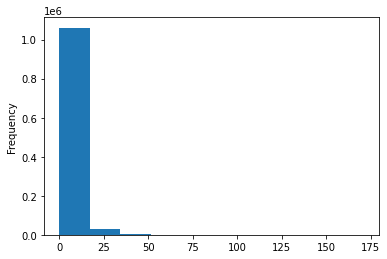

In [136]:
df['cases'].plot.hist()

**Was fällt Ihnen im Vergelich des oberen und unteren Histogramms auf?**

Dies ist ein Histogramm für die Spalte "age_first_order" in Abhängigkeit von "y = total_sum".

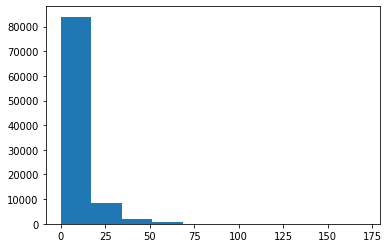

In [139]:
plt.hist(df["cases"],
         weights = df['deaths'])
plt.show()

## 1.4 Box-Plot
Der untere Code erzeugt ein Boxplot für das Attribut "pages_visited_avg".

**Welche statistische Größe repräsentiert diese?**
 - Median

**Was sagt der Unterschied zwischen Median und Mittelwert über die Verteilung aus?**
- Schiefe, im Beispiel starke Linksschiefe

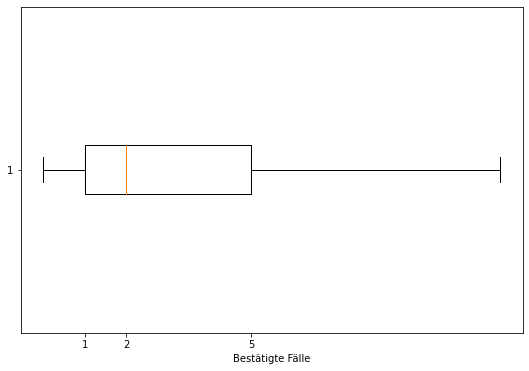

In [142]:
vel_arr = df['cases']
fig = plt.figure(1, figsize = (9, 6))
ax = fig.add_subplot()

ax.boxplot(vel_arr, vert = False, showfliers=False)
ax.set_xlabel('Bestätigte Fälle')
quantiles = np.quantile(vel_arr, np.array([0.25, 0.50, 0.75]))

ax.set_xticks(quantiles)

plt.show()
# Ausreißer wurden weg gelassen für eine bessere Darstellung

## 1.5 Lineare Korrelationen
Der Befehl corr() erstellt eine Tabelle mit allen (linearen) Korrelationen eines Dataframes. Die Tabelle ist redundant aufgebaut und daher ist nur eine der beiden "Dreieckmatrizen" wichtig zu betrachten. Wenden Sie den Befehl auf das Dataframe an.

**Welche beiden Werte korrelieren am stärksten positiv und welche am stärksten negativ?**    
Positiv: cases und recovered   
Negativ: Keine

In [143]:
df_corr = df.corr()
df_corr.head()

,cases,deaths,recovered
cases,1.000000,0.142567,0.977723
deaths,0.142567,1.000000,0.077025
recovered,0.977723,0.077025,1.000000


## 1.6 Korrelationen-Heatmap
Da Tabellen für das menschliche Auge nur schwer zu interpretieren sind, ist hier eine Heatmap einer Korrelationsmatrix dargestellt. Dem Parameter data muss die oben erstellte Korrelationstabelle übergeben werden.

<AxesSubplot:>

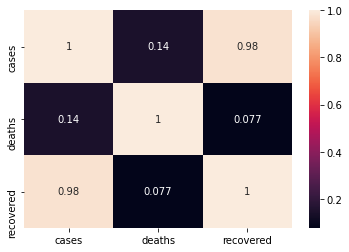

In [144]:
sn.heatmap(data = df_corr, annot = True)

## 1.7 Streudiagramme
Erzeugen Sie ein (pandas)-Streudiagramm (engl. scatter plot) zwischen age_first_order und total_sum.

<AxesSubplot:xlabel='cases', ylabel='deaths'>

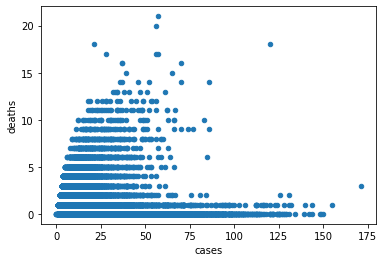

In [145]:
df.plot.scatter(x="cases", y="deaths")

Vergleichen Sie das Scatterplot mit der unteren Variante. Ändern Sie den Paramter s und beobachten Sie die Veränderung.

Text(0, 0.5, 'Tode')

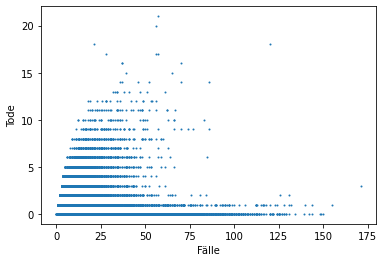

In [146]:
plt.scatter(df['cases'], df['deaths'], s = 1)
plt.xlabel('Fälle')
plt.ylabel('Tode')

Der untere Befehl erzeugt Streudiagramme von Kombinationen der Attributen und ordnet diese in Form einer Matrix an.

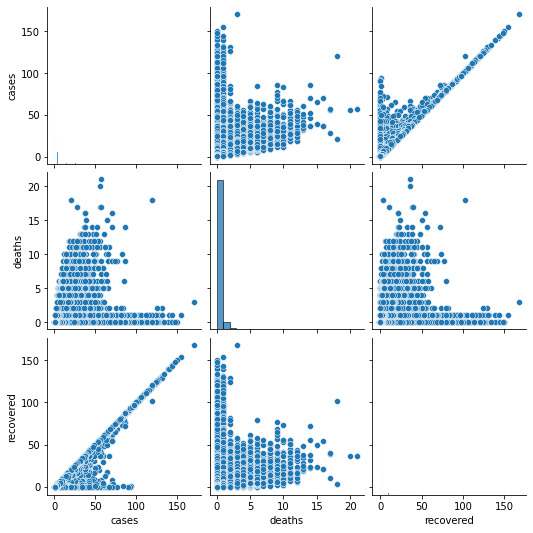

In [147]:
sn.pairplot(data = df[["cases", "deaths", "recovered"]])

## 1.8 Histogramme für kategorische Variablen

Bevor Histogramme mit dem obigen Befehlen plot.hist() erzeugt werden können, werden die Zeichenketten in numerische Werte konvertiert.

In [148]:
dfNumeric=df.copy()
dfNumeric['gender'].replace(to_replace=['M','F'] , value=[0, 1], inplace=True)
dfNumeric['gender'] = pd.to_numeric(dfNumeric['gender'])

<AxesSubplot:ylabel='Frequency'>

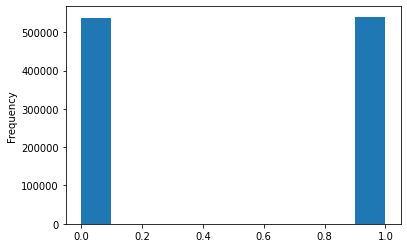

In [149]:
dfNumeric['gender'].plot.hist()

Schauen Sie sich nun das folgende Histogramm an. Recherchieren Sie den Unterschied der beiden Befehle.

<AxesSubplot:>

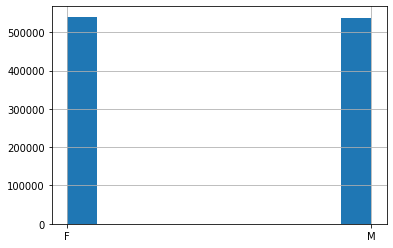

In [150]:
df['gender'].hist()

Nun erzeugen Sie ein Histogramm mit beiden Befehlen für user_agent_brand. Finden Sie dazu zunächst mit einem geeingneten Befehl heraus, welche unterschiedlichen Werte in der Spalte vorkommen.

<AxesSubplot:ylabel='Frequency'>

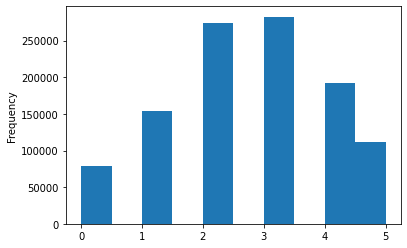

In [151]:
dfNumeric2 = df.copy()
dfNumeric2['age_group'].replace(to_replace=['00-04', '05-14', '15-34', '35-59', '60-79', '80-99'] , value=[0, 1, 2, 3, 4, 5], inplace=True)
dfNumeric2['age_group'] = pd.to_numeric(dfNumeric2['age_group'])
dfNumeric2['age_group'].plot.hist()

<AxesSubplot:>

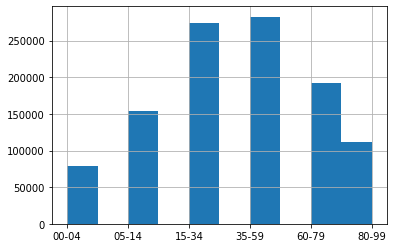

In [153]:
df['age_group'].hist()